In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install soundfile


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


## Generating square sine with Fourier's serie

Here's an example of a square sine generator using Fourier's series. For a square wave, the serie only contains odd values (1,3,5...):

$$
f\left( t \right) = \frac{4}{\pi} \sum_{n=1,3,5,...}^\infty \frac{ \sin(2\pi nf_0t) }{n}
$$

Where $f_0$ is the base note frequency (will be a A4, freq 440Hz).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def square_wave(frequency, duration, sample_rate, harmonics=10):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = np.zeros_like(t)
    for n in range(1, harmonics * 2, 2):  # even harmonics only
        wave += (1 / n) * np.sin(2 * np.pi * n * frequency * t)
    
    wave *= 4 / np.pi  # normalisation
    return t, 0.5 * wave

frequency = 440  # base note frequency in Hz (A4)
duration = 1.0   # duration
sample_rate = 44100  # sample rate in Hz, this value is = to CD sample rate

t, wave = square_wave(frequency, duration, sample_rate)

The two code blocks below display results in two ways: one by plotting the sine and the other by providing a wav sample.

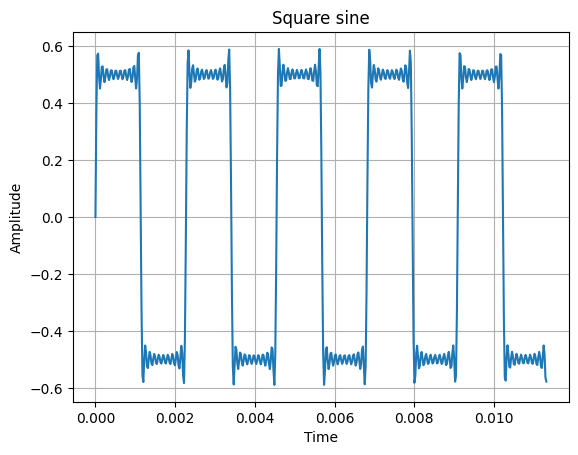

In [3]:
plt.plot(t[:500], wave[:500]) 
plt.title("Square sine")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [4]:
from scipy.io.wavfile import write

# wave = 16 bits encoding
wave_int16 = np.int16(wave * 32767)

write("sine_wave.wav", sample_rate, wave_int16)

In [5]:
from IPython.display import Audio
Audio("sine_wave.wav")

## Generating a melody with square signals

Below is a whole melody that leverages the square generator above: `C C C D E D C E D D C` ("Au claire de la lune").

In [6]:
def make_note(frequency):
    def play_note(length = 1):
        return square_wave(frequency, length * 0.5, sample_rate)
    return play_note

C = make_note(261.63)
D = make_note(293.66)
E = make_note(329.6)

wave = np.array([])
t = np.array([])
melody = [C(), C(), C(), D(), E(), E(), D(), D(), C(), E(), D(), D(), C(), C()]

for part_time, part_wave in melody:
    wave = np.concatenate((wave, part_wave))
    t = np.concatenate((t, part_time))

In [7]:
# wave = 16 bits encoding
wave_int16 = np.int16(wave * 32767)

write("song.wav", sample_rate, wave_int16)
from IPython.display import Audio
Audio("song.wav")

The spectrogram below shows the frenquencies, which should be foundamental frequencies and their harmonics.

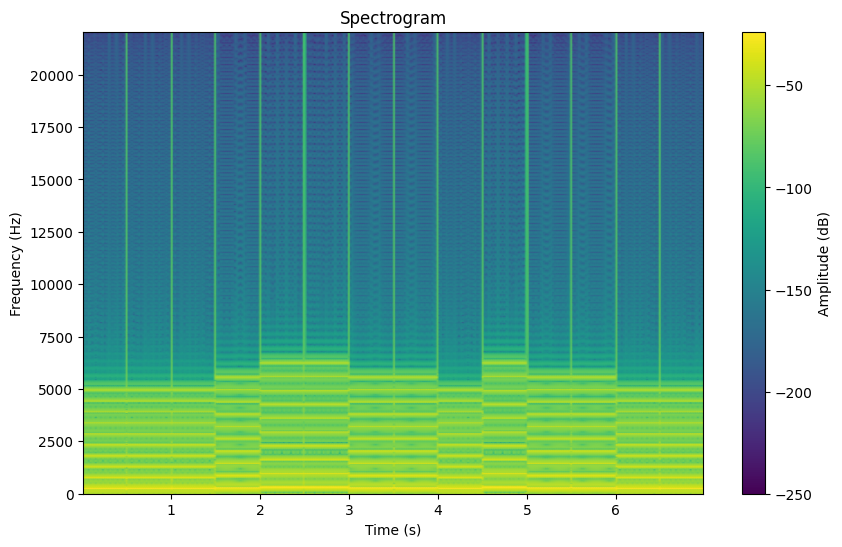

In [8]:
from scipy.signal import spectrogram

frequencies, times, Sxx = spectrogram(wave, fs=sample_rate, nperseg=1024)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Spectrogram")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Amplitude (dB)")
plt.show()